In [6]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 9.3 Epidemic Dynamics

**Simple SIR Model - Activity ONE**

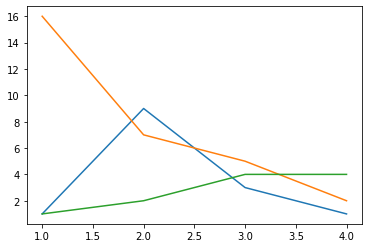

In [12]:

#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. Use a (.00001)and b (14) as varibles instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations - for example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.

#CODE HERE

#Shortest Mathplotlib tutorial ever.
#Just use this - you need to arrange the data each time as below - but really you don't need all the bells and whistles.

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 9, 3, 1])

plt.plot([1, 2, 3, 4], [16, 7, 5, 2])

plt.plot([1,2, 3, 4], [1, 2, 4, 4])



**Question 1:**
Test your model with a = .00001 and b = 10 over 50 days and check with the given textbook. Show the output. Provide simple context for this model with comments or text.


**Question 2:** Using your SIRPLOT code above, explore what happens when you change the length of time a disease takes to recover (which may happen with a new medicine for example). Provide examples from your model in code blocks and context and explanation in textblocks.



**Question 3:** Using your SIRPLOT code above, explore what happens to the course of a disease when you change the transmission coeffient a (which happens if people self-isolate for example). Provide examples from your model in code blocks and context and explanation in textblocks.

**SIR with Differential Equations**

**Question 4:**
Look at the following implementation of SIR (adapted from the https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) using differential equations. 

How is it the same and how is it different to SIRPLOT? Answer here with code and text examples.

**Question 5:**
Can you use this model to explore the Questions 2 and 3 above. Answer here.

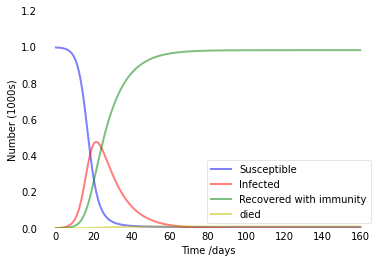

In [13]:


#Using Differential Equations


# Total population, N.
N = 1000

timeperiod =160
# Initial number of infected and recovered individuals, I0 and R0.
I0=1
R0 =1
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

D0 =0


#TRY modifying a and b

# Contact rate, a, and mean recovery rate, b, (in 1/days).

days=10 #(days to recover - how long are the infected able to pass it on )

a=.0005 #(more contact, how quickly it spreads)

b=1/days 

deathrate = .01
recover = 1 - deathrate





# A grid of time points (in days)
t = np.linspace(0, 160, timeperiod)

# The SIR model differential equations.
def deriv(y, t, N, a, b):
    S, I, R, D = y
    dSdt = -a * S * I 
    dIdt = a * S * I  - b * I
    dRdt = recover * (b * I)
    dDrt = deathrate * (b * I) 
    return dSdt, dIdt, dRdt, dDrt

# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, a, b))
S, I, R, D = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'y', alpha=0.5, lw=2, label='died')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**SIR with Matrices**

**Question 6:**
How is this implementation the same and different than SIRPLOT and the differential equation SIRmodel? Can you explore changes in the transmission coefficent and recovery rate the same way? Answer here.

**Question 7:**
What are the advantages and disadvantages of this matrix model?  Answer here.

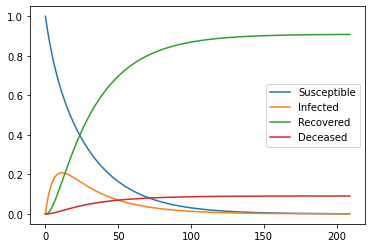

In [14]:


T  = 210 #number of days
a= .05         # % new infection each day
aS= 1 - a      # % remain suseptible
rnI= .04       # recover no immunity
rI= .1         # recover with immunity
rD= .01        # die from disease


A = np.matrix([[aS,rnI,0,0],[rnI+rD,(1-(rnI +rI + rD)) ,0,0],[0,rI,1,0],[0,rD,0,1]]) #dynamics matrix
x1 = np.array([1,0,0,0]) #initial state: everyone healthy
stateTraj = np.hstack([np.vstack(x1),np.zeros((4,T-1))]) #initialize trajectory with 0s
for t in range(T-1):
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])

for i in range(len(stateTraj)):
    plt.plot(range(T),stateTraj[i])

plt.legend(["Susceptible","Infected","Recovered","Deceased"])

(Want more? Check out Chapters 4 and 8 from Calculus in Context.)